In [27]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [83]:
house_data = pd.read_csv('./house-processed.csv')
loan_data = pd.read_csv('./loan-processed.csv')
health_data = pd.read_csv('./pharm-preproc.csv')

In [84]:
house_data

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType:ConLD,SaleType:COD,SaleType:New,SaleType:ConLw,SaleType:CWD,SaleCondition:Partial,SaleCondition:Family,SaleCondition:Normal,SaleCondition:AdjLand,SaleCondition:Alloca
0,0.241078,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.031580,...,0,0,0,0,0,0,0,1,0,0
1,0.203583,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.064803,0.173281,0.031580,...,0,0,0,0,0,0,0,1,0,0
2,0.261908,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.031580,...,0,0,0,0,0,0,0,1,0,0
3,0.145952,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.064803,0.038271,0.031580,...,0,0,0,0,0,0,0,0,0,0
4,0.298709,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.031580,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.194556,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.064803,0.078604,0.031580,...,0,0,0,0,0,0,0,1,0,0
1456,0.243161,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0,0,0,0,0,0,0,1,0,0
1457,0.321622,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.064803,0.048724,0.031580,...,0,0,0,0,0,0,0,1,0,0
1458,0.148903,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.064803,0.008682,0.698100,...,0,0,0,0,0,0,0,1,0,0


In [85]:
loan_data

,int_rate,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,open_acc,pub_rec.1,revol_bal,...,addr_state:UT,addr_state:MO,addr_state:MN,addr_state:MI,addr_state:KS,addr_state:MT,addr_state:MS,addr_state:SC,addr_state:KY,addr_state:OR
0,0.225180,0.130435,0.002106,0.691423,0.000000,0.030303,0.000000,0.024096,0.0,0.005330,...,0,0,0,0,0,0,0,0,0,0
1,0.420363,0.057971,0.002738,0.025006,0.000000,0.151515,0.000000,0.024096,0.0,0.000659,...,0,0,0,0,0,0,0,0,0,0
2,0.562738,0.072464,0.004634,0.133783,0.000000,0.060606,0.000000,0.036145,0.0,0.003210,...,0,0,0,0,0,0,0,0,0,0
3,0.394170,0.173913,0.007161,0.403101,0.000000,0.060606,0.000000,0.156627,0.0,0.001575,...,0,0,0,0,0,0,0,0,0,0
4,0.029996,0.089855,0.011163,0.263066,0.000000,0.000000,0.000000,0.228916,0.0,0.008918,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168043,0.433883,0.652174,0.004844,0.798950,0.000000,0.000000,0.000000,0.144578,0.0,0.016224,...,0,0,0,0,0,1,0,0,0,0
168044,0.529785,0.527536,0.005055,0.282071,0.000000,0.000000,0.000000,0.084337,0.0,0.003011,...,0,0,0,0,0,0,0,0,1,0
168045,0.450782,0.710145,0.010425,0.131783,0.000000,0.000000,0.000000,0.048193,0.0,0.006746,...,0,0,0,0,0,0,0,0,0,0
168046,0.379806,0.188406,0.005581,0.420105,0.105263,0.090909,0.003781,0.144578,2.0,0.001048,...,0,0,0,0,0,0,0,0,0,0


In [86]:
health_data

,TherapeuticDoseofWarfarin,Age,Height(cm),Weight(kg),ProjectSite:11,ProjectSite:10,ProjectSite:13,ProjectSite:12,ProjectSite:15,ProjectSite:14,...,VKORC13730consensus:G/G,VKORC13730consensus:A/A,VKORC12255consensus:NA,VKORC12255consensus:C/C,VKORC12255consensus:C/T,VKORC12255consensus:T/T,VKORC1-4451consensus:NA,VKORC1-4451consensus:C/C,VKORC1-4451consensus:A/C,VKORC1-4451consensus:A/A
0,0.149888,0.625,0.874140,0.401080,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.127517,0.500,0.642225,0.540992,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0.162672,0.375,0.445990,0.211586,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.082774,0.625,0.722433,0.278351,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0.127517,0.500,0.517348,0.189494,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.161074,0.125,0.767102,0.390771,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4679,0.081208,0.750,0.410310,0.107511,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4680,0.176957,0.625,0.802781,0.312715,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4681,0.217002,0.625,0.660065,0.261659,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [87]:
datasets = {'House': house_data, 'Loan': loan_data, 'Health': health_data}

In [61]:
err_ridge = {'House': [], 'Loan': [], 'Health': []}
err_lasso = {'House': [], 'Loan': [], 'Health': []}
err_elastic = {'House': [], 'Loan': [], 'Health': []}

# Ridge

In [62]:
for key in datasets:
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.Ridge(alpha=1e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    err_ridge[key].append(mse(model.predict(X_test), y_test))
    for poison_rate in p[1:]:
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)

        model_poison = linear_model.Ridge(alpha=1e-3)
        model_poison.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())

        err_ridge[key].append(mse(model_poison.predict(X_test), y_test))

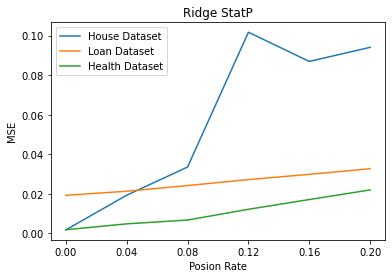

In [63]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in err_ridge:
    plt.plot(p, err_ridge[key], label= key + ' Dataset')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Ridge StatP')
plt.legend()
# plt.savefig('Ridge StatP.png')
plt.show()

# Lasso

In [64]:
for key in datasets:
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.Lasso(alpha=1e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    err_lasso[key].append(mse(model.predict(X_test), y_test))
    for poison_rate in p[1:]:
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)

        model_poison = linear_model.Lasso(alpha=1e-3)
        model_poison.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())

        err_lasso[key].append(mse(model_poison.predict(X_test), y_test))

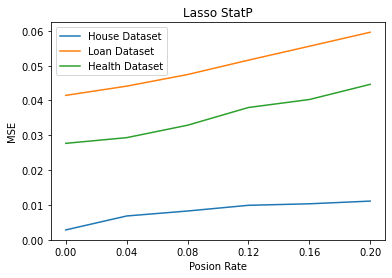

In [65]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in err_lasso:
    plt.plot(p, err_lasso[key], label= key + ' Dataset')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Lasso StatP')
plt.legend()
# plt.savefig('Ridge StatP.png')
plt.show()

# Elastic

In [66]:
err_elastic = {'House': [], 'Loan': [], 'Health': []}
for key in datasets:
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.ElasticNet(alpha=2e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    err_elastic[key].append(mse(model.predict(X_test), y_test))
    for poison_rate in p[1:]:
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)

        model_poison = linear_model.ElasticNet(alpha=2e-3)
        model_poison.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())

        err_elastic[key].append(mse(model_poison.predict(X_test), y_test))

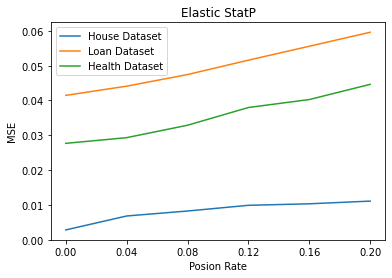

In [67]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in err_elastic:
    plt.plot(p, err_lasso[key], label= key + ' Dataset')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Elastic StatP')
plt.legend()
plt.savefig('Elastic StatP.png')
plt.show()

In [70]:
err_ridge

{'House': [0.0017450788316539874,
  0.0192770671190173,
  0.03352045311651039,
  0.1016760748009852,
  0.0869291058291674,
  0.09404714631486938],
 'Loan': [0.01923576928289977,
  0.02129196240910072,
  0.024168177081197652,
  0.02717590408173405,
  0.02983849879674875,
  0.03265971330723129],
 'Health': [0.0018326173360509092,
  0.004808077430494349,
  0.006742908905651439,
  0.012170460133597934,
  0.017100517667010942,
  0.021958462085385416]}

In [7]:
def roni_defense(x, y, n, model, n_iter=3, val_ratio=0.3):
    N, _ = x.shape
    all_increases = []  
    for i in range(N):
        curx, cury = x[i], y[i]
        cur_increase = 0
        for j in range(n_iter):
            # sample train, valid set
            train_size = int((1- val_ratio)*N)
            inds = np.random.choice(N,size=N)
            traininds = inds[:train_size]
            validinds = inds[train_size:]

            trainx, trainy = x[traininds], y[traininds]
            validx, validy = x[validinds], y[validinds]

            # train on both train and train plus point
            model_exclude = type(model)(alpha=model.alpha)
            model_exclude.fit(trainx, trainy)
            model_include = type(model)(alpha=model.alpha)
            model_include.fit(np.append(trainx,curx.reshape((1,-1)),axis=0),np.append(trainy,cury.reshape((1,)),axis=0))

            exclude_valid = model_exclude.predict(validx)
            exclude_mse = mse(exclude_valid, validy)

            include_valid = model_include.predict(validx)
            include_mse = mse(include_valid, validy)

            cur_increase += (include_mse-exclude_mse)

        all_increases.append(cur_increase/n_iter)

    sort_indices = np.argsort(np.array(all_increases))[:n]
    clean_x, clean_y = x[sort_indices], y[sort_indices]
    model.fit(clean_x, clean_y)

In [8]:
def trim_defense(X, y, n, model, n_iter=10000, epsilon=1e-8):
    """
       Trains the model using TRIM algorithm 
    """
    N, _ = X.shape
    train_indices = np.random.permutation(N)[:n]
    x_t = X[train_indices]
    y_t = y[train_indices]
    model.fit(x_t, y_t)
    curr_obj = mse(model.predict(x_t), y_t)
#     curr_obj = model.objective(x_train, y_train)
    for i in range(n_iter):
#         curr_w = model.w
#         curr_b = model.b
        loss_i = np.square(model.predict(X) - y)
        sort_indices = np.argsort(loss_i)[:n]
        x_t = X[sort_indices]
        y_t = y[sort_indices]
        model.fit(x_t, y_t)
        new_obj = mse(model.predict(x_t), y_t)
        if curr_obj - new_obj > epsilon:
            break

        curr_obj = new_obj

# Defense StatP

In [80]:
defense_data = {}
for key in ['Loan']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[], 'RONI':[]}
    data = datasets[key]
    y = data.iloc[:1000, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    data = data.iloc[:1000, :]
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.23, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.ElasticNet(alpha=2e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

#     defense_err[defense].append(mse(model.predict(X_test), y_test))
    for poison_rate in p[1:]:
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                trim_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.ElasticNet(alpha=2e-3))
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RONI':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                roni_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_data[key] = defense_err

Loan
TRIM
Huber
RANSAC
RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TRIM
Huber
RANSAC
RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TRIM
Huber
RANSAC
RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TRIM
Huber
RANSAC
RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TRIM
Huber
RANSAC
RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


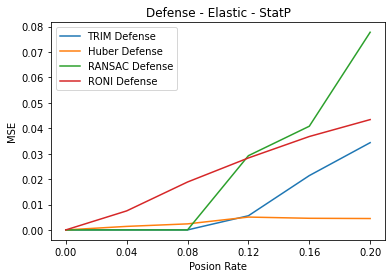

In [81]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data['Loan']:
    plt.plot(p, defense_data['Loan'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Elastic - StatP')
plt.legend()
plt.savefig('Loan Elastic Defense StatP.png')
plt.show()

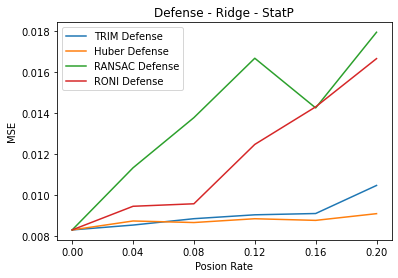

In [26]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data['Health']:
    plt.plot(p, defense_data['Health'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Ridge - StatP')
plt.legend()
plt.savefig('Health Ridge Defense StatP.png')
plt.show()

In [10]:
# np.random.seed(0)
defense_data_lasso = {}
for key in ['Health']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[], 'RONI':[]}
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.Lasso(alpha=1e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

    for poison_rate in p[1:]:
        print(poison_rate)
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.Lasso(alpha=1e-3)
                trim_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.Lasso(alpha=1e-3), max_trials=200, residual_threshold=1e-4)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RONI':
                model_defense = linear_model.Lasso(alpha=1e-3)
                roni_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_data_lasso[key] = defense_err

Health
0.04
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006962474599607749, tolerance: 0.0006810612057192568
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010595409321187965, tolerance: 0.0007519899801004833
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010081580920981992, tolerance: 0.000455474696704691
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011156006438872712, tolerance: 0.0008971181563928646
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge.

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0130187470514187, tolerance: 0.008001638396082771
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012986309178920408, tolerance: 0.008001736042616362
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015707814682777155, tolerance: 0.007789431533702434
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017722303981592802, tolerance: 0.008782149234791129
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01749599978239047, tolerance: 0.008782208046251254
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03427715444746582, tolerance: 0.008155883987090122
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01509957292073949, tolerance: 0.00944270534890187
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015020616625911032, tolerance: 0.009443054471668096
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007979542250090788, tolerance: 0.007638222208514995
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009546251273668815, tolerance: 0.008075445228912567
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009678270097033703, tolerance: 0.008075808425148333
  positive)


0.08
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01402228430937158, tolerance: 0.0013144626106413458
  positive)


RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06240934051915392, tolerance: 0.0013948765584174203
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001274893449796366, tolerance: 0.0012433939337821727
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003930798909758337, tolerance: 0.0013335942810321635
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024970847921295558, tolerance: 0.015919056117670888
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026511353933230453, tolerance: 0.015919531419973737
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021447778756382263, tolerance: 0.014981372334939529
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

0.12
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003978942599472957, tolerance: 0.0013861996256619201
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029247879908782526, tolerance: 0.0017696761223663473
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010590368933049987, tolerance: 0.0022976365006560358
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013519579486492628, tolerance: 0.0018933183593348073
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024801967481550946, tolerance: 0.0223868470161094
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024826791386715286, tolerance: 0.022389410228251604
  positive)


0.16
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01596541628421244, tolerance: 0.0021952239354506896
  positive)


RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003258089945200826, tolerance: 0.002033228016261752
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00854408634386461, tolerance: 0.002335207482919209
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035754229666721926, tolerance: 0.0021257873424242106
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

RONI
0.2
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011555317279170918, tolerance: 0.0028391187438329144
  positive)


RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002681717133473427, tolerance: 0.0023689082940838665
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013217708628242786, tolerance: 0.001989212161387146
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030113231244331295, tolerance: 0.0027549960413409337
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037390829045421015, tolerance: 0.035870492033515465
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036068334652867406, tolerance: 0.035875141894079934
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0661455992349147, tolerance: 0.03722133441154512
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

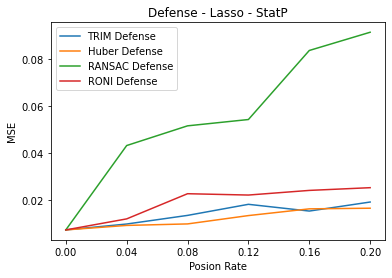

In [32]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data['House']:
    plt.plot(p, defense_data['House'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Lasso - StatP')
plt.legend()
plt.savefig('House Lasso Defense StatP.png')
plt.show()

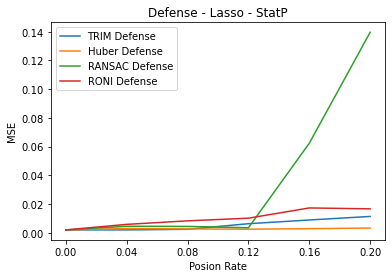

In [12]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data_lasso['Health']:
    plt.plot(p, defense_data_lasso['Health'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Lasso - StatP')
plt.legend()
plt.savefig('Health Lasso Defense StatP.png')
plt.show()

In [13]:
# np.random.seed(0)
defense_data_elastic = {}
for key in ['Health']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[], 'RONI':[]}
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.ElasticNet(alpha=2e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

    for poison_rate in p[1:]:
        print(poison_rate)
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                trim_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.ElasticNet(alpha=2e-3), max_trials=200, residual_threshold=1e-4)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RONI':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                roni_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_data_elastic[key] = defense_err

Health
0.04
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011138563882344243, tolerance: 0.0011690180759803923
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018124481946432347, tolerance: 0.0010491038602941176
  positive)


RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02235470623951441, tolerance: 0.0008471430759803923
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014381792957882666, tolerance: 0.0010329273897058823
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002242545625216863, tolerance: 0.0009890548406862746
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0357098341195865, tolerance: 0.0105701033464567
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037034973288797346, tolerance: 0.010572551377350243
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02461769967227667, tolerance: 0.010939539588801402
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

0.08
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019361533227320038, tolerance: 0.0014537607230392154
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009594205109646925, tolerance: 0.001091076899509804
  positive)
/Users/purujit/anaconda3/lib/p

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020542443511866626, tolerance: 0.0011811274509803923
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04203859994676318, tolerance: 0.0013428538602941176
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05960243958025213, tolerance: 0.0012771139705882353
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03506795329083978, tolerance: 0.0012772058823529414
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015275055764123913, tolerance: 0.0012506357230392157
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057659776829721565, tolerance: 0.0010846507352941178
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Y

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03974483786555538, tolerance: 0.014639441664920379
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03967468966337151, tolerance: 0.01463976225387516
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05634687155931317, tolerance: 0.013415135818315174
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03806040945531208, tolerance: 0.014167712699077956
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03784445393588953, tolerance: 0.01417144820904902
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025034011879711215, tolerance: 0.014880458927074602
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020844786931036197, tolerance: 0.013623195856035207
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01958367051857124, tolerance: 0.013632106200251357
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05395098420436284, tolerance: 0.01397314281223806
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016015080290699757, tolerance: 0.01423692699601844
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015760653560803917, tolerance: 0.014240194281524931
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028563361701770873, tolerance: 0.014644184828164302
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You m

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035046484212358564, tolerance: 0.014412799801005441
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06129473246605244, tolerance: 0.014226498323554057
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06104765635102183, tolerance: 0.01422956247381651
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021816932614967754, tolerance: 0.013969014564124055
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021819042620364826, tolerance: 0.013972843789275243
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06412899462672783, tolerance: 0.01413404822401509
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03974188079391183, tolerance: 0.0139036364469824
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03975740034607611, tolerance: 0.013907010630498526
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03727443584284629, tolerance: 0.013738496044635378
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

0.12
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004284592450138014, tolerance: 0.0015209788602941177
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003952868119582398, tolerance: 0.0015604779411764707
  positive)
/Users/purujit/anaconda3/lib/p

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022750485813186394, tolerance: 0.0017005208333333336
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011933983980977558, tolerance: 0.001421936274509804
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016674876166282715, tolerance: 0.001656311274509804
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010738477743314156, tolerance: 0.0015698529411764708
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02454644107103654, tolerance: 0.0015515318627450981
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01287510342423559, tolerance: 0.0014551470588235293
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05626621927351039, tolerance: 0.01716046511627907
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0562429696583564, tolerance: 0.017160681362725458
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027950628478450312, tolerance: 0.018288212334603045
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02252344049620092, tolerance: 0.01759669769947875
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022365594833431146, tolerance: 0.01759737224448898
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020484765674851246, tolerance: 0.01798772804731355
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03604073614620518, tolerance: 0.01707829158316633
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022874737907670806, tolerance: 0.01693384372493985
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022945835498333622, tolerance: 0.01693835796593187
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03235947987599275, tolerance: 0.017134352454909817
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.061228394164984934, tolerance: 0.01759247443865276
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06118879984846615, tolerance: 0.017595136523046093
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027258064300852425, tolerance: 0.018269192134268537
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03132450221305305, tolerance: 0.017724639133921423
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03125580568030273, tolerance: 0.017728967935871743
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02323068551704921, tolerance: 0.01746116993283882
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02321178437148319, tolerance: 0.01746180235470942
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031166328194885295, tolerance: 0.017610014660184442
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02797146391986871, tolerance: 0.016825820390781565
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035352279347435456, tolerance: 0.0169389685244587
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03533690952842505, tolerance: 0.01693964554108217
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.056955938389648963, tolerance: 0.018355151553106196
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04924173130723375, tolerance: 0.01778978611166801
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04926808209532396, tolerance: 0.017790393286573142
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020413351864206675, tolerance: 0.017195263632718515
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02917427352608115, tolerance: 0.017224922344689374
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06254408230039132, tolerance: 0.018106791925621486
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

0.16
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016020494523817597, tolerance: 0.0018287683823529413
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00185572252757904, tolerance: 0.0015542892156862745
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006371432232556984, tolerance: 0.0013576899509803923
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018027073103222158, tolerance: 0.001522326899509804
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00978404587278181, tolerance: 0.0014052389705882355
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6585546223822952e-05, tolerance: 8.125e-06
  positive)


RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039122784591342, tolerance: 0.020332997273249134
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03913741666934811, tolerance: 0.020333966143840858
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03508160309050368, tolerance: 0.020380946230386526
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024686298710378196, tolerance: 0.02016360624760811
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02464002723638714, tolerance: 0.02016442772092579
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.053597072933683876, tolerance: 0.020765461155759685
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

0.2
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020443019388557637, tolerance: 0.0019658930759803924
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00888428519467599, tolerance: 0.0018514935661764708
  positive)
/Users/purujit/anaconda3/lib/py

RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007162520795555238, tolerance: 0.0017979473039215685
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006366564647417583, tolerance: 0.0016350183823529414
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00406308354135021, tolerance: 0.0018296798406862744
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06553751020488541, tolerance: 0.0017326899509803925
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020299176342208902, tolerance: 0.001699448529411765
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004339963091710253, tolerance: 0.0015854779411764708
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

RONI


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.051051412702662446, tolerance: 0.023520311930575806
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05102418843563328, tolerance: 0.023526561930783244
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030988889134107467, tolerance: 0.024744904792274054
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You m

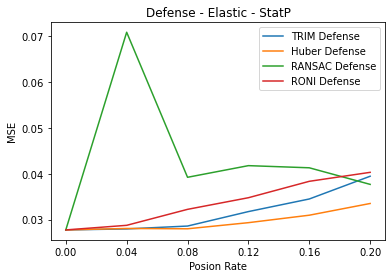

In [15]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data_elastic['Health']:
    plt.plot(p, defense_data_elastic['Health'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Elastic - StatP')
plt.legend()
plt.savefig('Health Elastic Defense StatP.png')
plt.show()

In [16]:
# np.random.seed(0)
# defense_data_elastic = {}
for key in ['House']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[], 'RONI':[]}
    data = datasets[key]
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.ElasticNet(alpha=2e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

    for poison_rate in p[1:]:
        print(poison_rate)
        poison_ratio = poison_rate/(1 - poison_rate)
        n_poison = int(poison_ratio*X_train.shape[0])

        X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
        y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

        X_train_poison = X_train.append(X_poison, ignore_index=True)
        y_train_poison = y_train.append(y_poison, ignore_index=True)
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                trim_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.ElasticNet(alpha=2e-3), max_trials=200, residual_threshold=1e-4)
                model_defense.fit(X_train_poison.to_numpy(), y_train_poison.to_numpy())
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RONI':
                model_defense = linear_model.ElasticNet(alpha=2e-3)
                roni_defense(X_train_poison.to_numpy(), y_train_poison.to_numpy(), X_train.shape[0], model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_data_elastic[key] = defense_err

House
0.04
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSAC
RONI
0.08
TRIM
Huber


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.17279410257358e-06, tolerance: 2.511583925152274e-06
  positive)


RONI
0.12
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.234682876486793e-06, tolerance: 4.6157485263401275e-06
  positive)


RONI
0.16
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RONI
0.2
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.305910793757615e-07, tolerance: 2.577732023170032e-07
  positive)


RONI


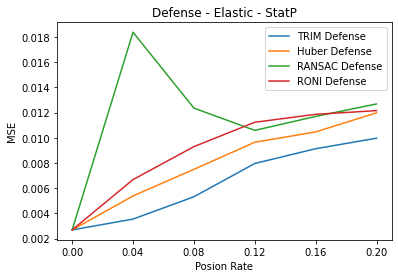

In [17]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_data_elastic['House']:
    plt.plot(p, defense_data_elastic['House'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Elastic - StatP')
plt.legend()
plt.savefig('House Elastic Defense StatP.png')
plt.show()

In [18]:
import pickle

# BGD

In [139]:
# np.random.seed(0)
# defense_data_elastic = {}
defense_BGD_Ridge = {}
for key in ['Loan']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[], 'RONI':[]}
    data = datasets[key].copy()
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.001, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.Lasso(alpha=1e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

    for poison_rate in p[1:]:
        print(poison_rate)
#         poison_ratio = poison_rate/(1 - poison_rate)
#         n_poison = int(poison_ratio*X_train.shape[0])

#         X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
#         y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

#         X_train_poison = X_train.append(X_poison, ignore_index=True)
#         y_train_poison = y_train.append(y_poison, ignore_index=True)
        dbfile = open('poisoned_dataset/poisoned_data_Lasso_BGD_Loan_p' + str(poison_rate), 'rb')
        poison_dataset = pickle.load(dbfile)
        X_train_poison = poison_dataset[:, 1:]
        print(X_train_poison.shape)
        y_train_poison = poison_dataset[:, 0]
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.Lasso(alpha=1e-3)
                trim_defense(X_train_poison, y_train_poison, 350, model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison, y_train_poison)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.Lasso(alpha=1e-3), max_trials=200, residual_threshold=1e-4)
                model_defense.fit(X_train_poison, y_train_poison)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RONI':
                model_defense = linear_model.Lasso(alpha=1e-3)
                roni_defense(X_train_poison, y_train_poison, 350, model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_BGD_Ridge[key] = defense_err

Loan
0.04
(525, 88)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two sa

RONI
0.08
(547, 88)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two sa

RONI
0.12
(572, 88)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two sa

RONI
0.16
(600, 88)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two sa

RONI
0.2
(630, 88)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RONI


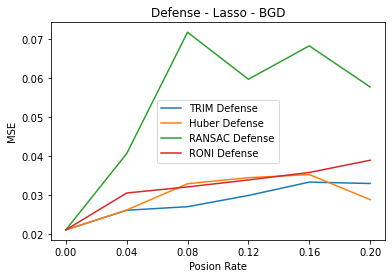

In [140]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_BGD_Ridge['Loan']:
    plt.plot(p, defense_BGD_Ridge['Loan'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Lasso - BGD')
plt.legend()
plt.savefig('Loan Lasso Defense BGD.png')
plt.show()

In [54]:
loan_data.shape

(168048, 89)

In [126]:
# np.random.seed(0)
# defense_data_elastic = {}
defense_RVO_Ridge = {}
for key in ['Health']:
    print(key)
    defense_err = {'TRIM': [], 'Huber': [], 'RANSAC':[]}
    data = datasets[key].copy()
    y = data.iloc[:, 0]
    data.drop(data.columns[0], inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    sample = X_train.sample(frac=1, axis=0)
    mean = sample.mean(axis=0).to_numpy()
    cov = sample.cov().to_numpy()
    model = linear_model.ElasticNet(alpha=1e-3)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
    for defense in defense_err:
        defense_err[defense].append(mse(model.predict(X_test), y_test))

    for poison_rate in p[1:]:
        print(poison_rate)
#         poison_ratio = poison_rate/(1 - poison_rate)
#         n_poison = int(poison_ratio*X_train.shape[0])

#         X_poison = pd.DataFrame(np.around(np.random.multivariate_normal(mean, cov, n_poison)), columns=X_train.columns)
#         y_poison = pd.Series(1 - np.around(model.predict(X_poison)))

#         X_train_poison = X_train.append(X_poison, ignore_index=True)
#         y_train_poison = y_train.append(y_poison, ignore_index=True)
        dbfile = open('poisoned_dataset/poisoned_data_Elastic_RVO_Medical_p' + str(poison_rate), 'rb')
        poison_dataset = pickle.load(dbfile)
        X_train_poison = poison_dataset[:, 1:]
        print(X_train_poison.shape)
        y_train_poison = poison_dataset[:, 0]
        
        for defense in defense_err:
            print(defense)
            if defense == 'TRIM':
                model_defense = linear_model.ElasticNet(alpha=1e-3)
                trim_defense(X_train_poison, y_train_poison, 300, model_defense)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'Huber':
                model_defense = linear_model.HuberRegressor(alpha=1e-3)
                model_defense.fit(X_train_poison, y_train_poison)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
            if defense == 'RANSAC':
                model_defense = linear_model.RANSACRegressor(linear_model.ElasticNet(alpha=1e-3), max_trials=200, residual_threshold=1e-4)
                model_defense.fit(X_train_poison, y_train_poison)
                defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
#             if defense == 'RONI':
#                 model_defense = linear_model.ElasticNet(alpha=1e-3)
#                 roni_defense(X_train_poison, y_train_poison, 300, model_defense)
#                 defense_err[defense].append(mse(model_defense.predict(X_test), y_test))
    defense_RVO_Ridge[key] = defense_err

Health
0.04
(487, 204)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21181625334223275, tolerance: 0.0009988635752936528
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13032047661318646, tolerance: 0.0007890023841013019
  positive)
/Users/purujit/anaconda3/lib/pyt

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03624673021511171, tolerance: 0.0007171728291641109
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15363401931676446, tolerance: 0.0007966310554159609
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06320329224821775, tolerance: 0.0008669952957647425
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22087675482628666, tolerance: 0.000954112165754841
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06016179984970993, tolerance: 0.0008021587770956639
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02173032752761772, tolerance: 0.0006289647096716076
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You m

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07906551398670691, tolerance: 0.0009469997966837552
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12244056871403064, tolerance: 0.0007902685426556502
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21669499495589695, tolerance: 0.000792349659455563
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You m

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005762616031768086, tolerance: 0.0006347101739366267
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12875399693571454, tolerance: 0.000877347690130252
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029622435983923445, tolerance: 0.0006386739512519642
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12658561009843794, tolerance: 0.0006367295563894572
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1306286035708768, tolerance: 0.0008042087995086377
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033677838703290774, tolerance: 0.00047372339712913053
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You

0.08
(508, 204)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018101971470994016, tolerance: 0.0013329532994475612
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005505415271523262, tolerance: 0.00171975680279887
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004484943428139765, tolerance: 0.0011893766313573115
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008874685332962429, tolerance: 0.0016043429428890057
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.042643557658057496, tolerance: 0.0014643618783427904
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03228742239087179, tolerance: 0.0013363761424372677
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

0.12
(531, 204)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027513859307141786, tolerance: 0.0038615812807139627
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02763866150758787, tolerance: 0.003712252795249503
  positive)
/Users/purujit/anaconda3/lib/pyt

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0153415761399458, tolerance: 0.0041713546247182315
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021344675628430565, tolerance: 0.0034950804234775163
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006694653186610111, tolerance: 0.004035778509244176
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022501019064456784, tolerance: 0.0027435442645007443
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011182764223836017, tolerance: 0.0032050685153177383
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011817704578021448, tolerance: 0.004219277359686752
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. Yo

0.16
(557, 204)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06866797341766073, tolerance: 0.005646297810746156
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30298892979844183, tolerance: 0.005559073935924484
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15974690190266827, tolerance: 0.005910872068388469
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23778349285630895, tolerance: 0.005266411125239364
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46290555856826643, tolerance: 0.005770901980129919
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05375424708207177, tolerance: 0.005163956229203333
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10902088172645108, tolerance: 0.0059689659810465805
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018068723062214076, tolerance: 0.006217745437929398
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017910618166297354, tolerance: 0.005295424286425866
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06981410753570216, tolerance: 0.006258942898721024
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4042590007697733, tolerance: 0.0060558345280092634
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03238126585372214, tolerance: 0.005186069574769351
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010943483683561794, tolerance: 0.004533684626206328
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01861076089960889, tolerance: 0.005090733218152769
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034305294001818254, tolerance: 0.006310936034862468
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You m

0.2
(585, 204)
TRIM
Huber
RANSAC


/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16735323446890504, tolerance: 0.007163284461764807
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12051471397197844, tolerance: 0.006868899018101334
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6890398273719072, tolerance: 0.007688366702999242
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2591757726699981, tolerance: 0.008197794042556501
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05304248174754633, tolerance: 0.0075753155780931315
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0225

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2679912617827114, tolerance: 0.007723455887139688
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11960405963812804, tolerance: 0.007240695872664023
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09641088066913284, tolerance: 0.00647071701174952
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.032071706605222516, tolerance: 0.0077116479458248935
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29576777811538335, tolerance: 0.006411262821352726
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.057685353408686524, tolerance: 0.007525771915863652
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You 

/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06330271988878167, tolerance: 0.007867976405449884
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3312900667486147, tolerance: 0.006956640057601334
  positive)
/Users/purujit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09202

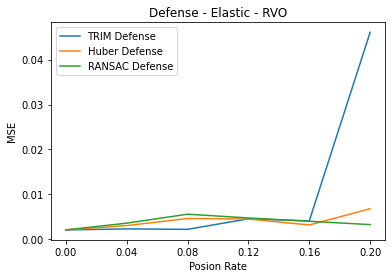

In [127]:
p = [0, 0.04, 0.08, 0.12, 0.16, 0.2]
for key in defense_RVO_Ridge['Health']:
    plt.plot(p, defense_RVO_Ridge['Health'][key], label= key + ' Defense')

plt.xticks(p)
plt.xlabel('Posion Rate')
plt.ylabel('MSE')
plt.title('Defense - Elastic - RVO')
plt.legend()
plt.savefig('Health Elastic Defense RVO.png')
plt.show()